# Import required libraries and the dataset

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from descartes import PolygonPatch
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
# from matplotlib.patches import Polygon

In [408]:
df = pd.read_csv('earthquake.csv')

In [411]:
df.head()

,Lat,Long,Magnitude,Epicenter,DateTime
0,27.75,86.16,5.1,Dolakha,1994-06-25 05:45:00
1,29.37,81.52,5.5,Bajura,1994-07-17 11:00:00
2,28.34,87.35,4.8,Sankhuwasabha,1994-09-25 11:00:00
3,29.00,82.26,4.6,Jajarkot,1994-10-22 11:00:00
4,28.92,82.00,4.7,Jajarkot,1994-10-24 11:00:00


In [410]:
# drop the columns that are not required
df = df.drop(['Unnamed: 0','index'],axis = 1)
df['DateTime'] = pd.to_datetime(df['DateTime'],  errors='coerce')
df.DateTime.dtype

dtype('<M8[ns]')

In [412]:
df.describe()

,Lat,Long,Magnitude
count,933.000000,933.000000,933.000000
mean,28.137230,84.950361,4.432262
std,0.738576,1.891978,0.453052
min,26.630000,80.370000,3.600000
25%,27.710000,84.370000,4.100000
50%,27.890000,85.550000,4.300000
75%,28.290000,86.120000,4.600000
max,30.370000,88.330000,7.600000


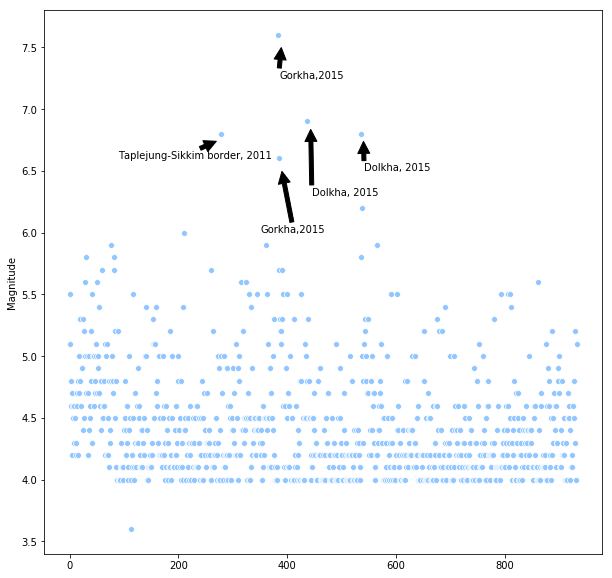

In [413]:
#plot magnitudes
plt.figure(figsize=(10,10))
sns.scatterplot(y="Magnitude", x=df.Magnitude.index , data=df)
plt.annotate('Gorkha,2015', xy=(389, 7.5), xytext=(385, 7.25),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Gorkha,2015', xy=(390, 6.5), xytext=(350, 6.0),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Dolkha, 2015', xy=(443, 6.84), xytext=(445, 6.3),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Dolkha, 2015', xy=(540, 6.74), xytext=(541, 6.5),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Taplejung-Sikkim border, 2011', xy=(270, 6.74), xytext=(90, 6.6),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.savefig('overall_earthquakes.png')



In [414]:
#group by magnitude counts
df_magnitude_count = pd.DataFrame(df.Magnitude.groupby(df.Magnitude).count())
df_magnitude_count['index'] = df_magnitude_count.index
df_magnitude_count.columns = ["Count","Magnitude"]

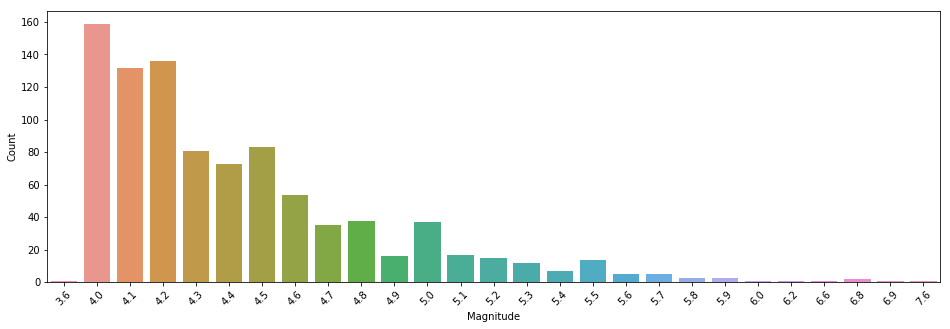

In [415]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x="Magnitude", y="Count", data=df_magnitude_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('magnitude_count.png')


# Earthquake Magnitude Classes

In [416]:
scale = []
for magnitude in df.Magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        scale.append("Limited Damage")
    elif magnitude >=4.0 and magnitude <=4.9:
        scale.append("Minor Damage")
    elif magnitude >=5.0 and magnitude <=5.9:
        scale.append("Slight Damage")
    elif magnitude >=6.0 and magnitude <=6.9:
        scale.append("Severe Damage")
    elif magnitude >=7.0 and magnitude <=7.9:
        scale.append("Serious Damage")
    else:
        scale.append("Great Damage")
        

In [479]:
df['Estimated Damage'] = scale


In [418]:
df_damage_count = pd.DataFrame(df.scale.groupby(df.scale).count().sort_values(ascending=False))
df_damage_count['percent'] = ((df_damage_count.scale)/sum(df_damage_count.scale))*100


Text(0.5, 0, 'Magnitude class')

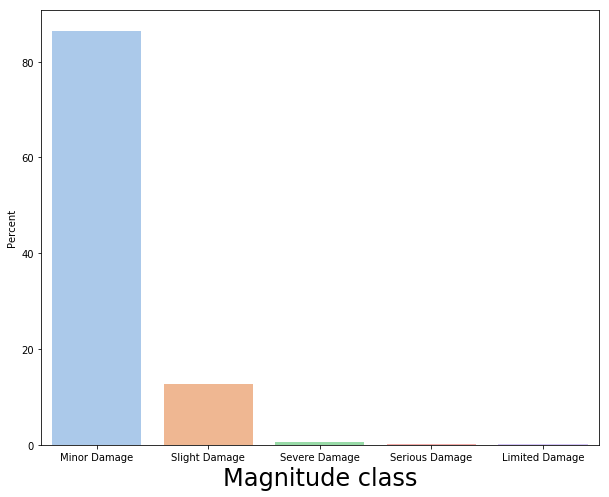

In [419]:
plt.figure(figsize=(10,8))
sns.barplot(df_damage_count.index,df_damage_count.percent, palette="pastel")
# plt.xticks(df_damage_count.index, rotation= 10)
plt.ylabel('Percent')
plt.xlabel('Magnitude class', fontsize=24)


Magnitude class size: "Great", "Major", "Strong", "Moderate",
                                  "Light", "Minor", "Less than 3.9")

In [420]:
size_class = []
for magnitude in df.Magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        size_class.append("Minor")
    elif magnitude >=4.0 and magnitude <=4.9:
        size_class.append("Light")
    elif magnitude >=5.0 and magnitude <=5.9:
        size_class.append("Moderate")
    elif magnitude >=6.0 and magnitude <=6.9:
        size_class.append("Strong")
    elif magnitude >=7.0 and magnitude <=7.9:
        size_class.append("Major")
    else:
        size_class.append("Great")
df['size_class'] = size_class

In [421]:
df_size_class = pd.DataFrame(df.size_class.groupby(df.size_class).count())

In [422]:
df_size_class['percent'] = ((df_size_class.size_class)/sum(df_size_class.size_class))*100

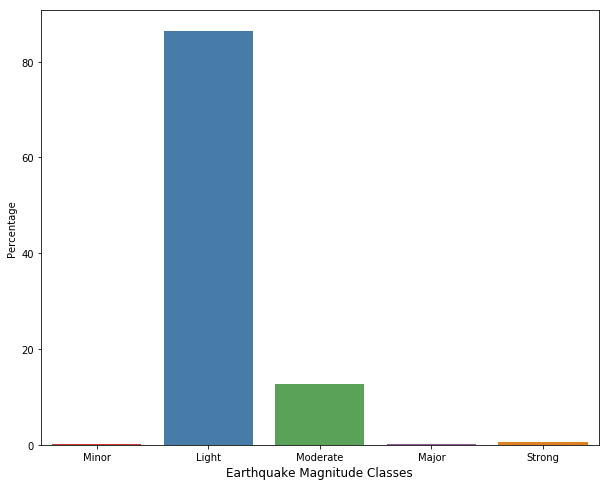

In [423]:
plt.figure(figsize=(10,8))
sns.barplot(df_size_class.index,df_size_class.percent, palette="Set1", order = ['Minor','Light','Moderate',
                                                                                     'Major',
                                                                                    'Strong'])
plt.ylabel('Percentage')
plt.xlabel('Earthquake Magnitude Classes', fontsize=12)
plt.savefig('magnitude_classes.png')

In [424]:
mag_class = []
for magnitude in df.Magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        mag_class.append("3-3.9")
    elif magnitude >=4.0 and magnitude <=4.9:
        mag_class.append("4-4.9")
    elif magnitude >=5.0 and magnitude <=5.9:
        mag_class.append("5-5.9")
    elif magnitude >=6.0 and magnitude <=6.9:
        mag_class.append("6-6.9")
    elif magnitude >=7.0 and magnitude <=7.9:
        mag_class.append("7-7.9")
    else:
        mag_class.append("Above 8")
df['mag_class'] = mag_class

In [425]:
group_by_year = pd.DataFrame(df.Magnitude.groupby([df['DateTime'].dt.year]).count())
group_by_year.columns = ['Frequency']

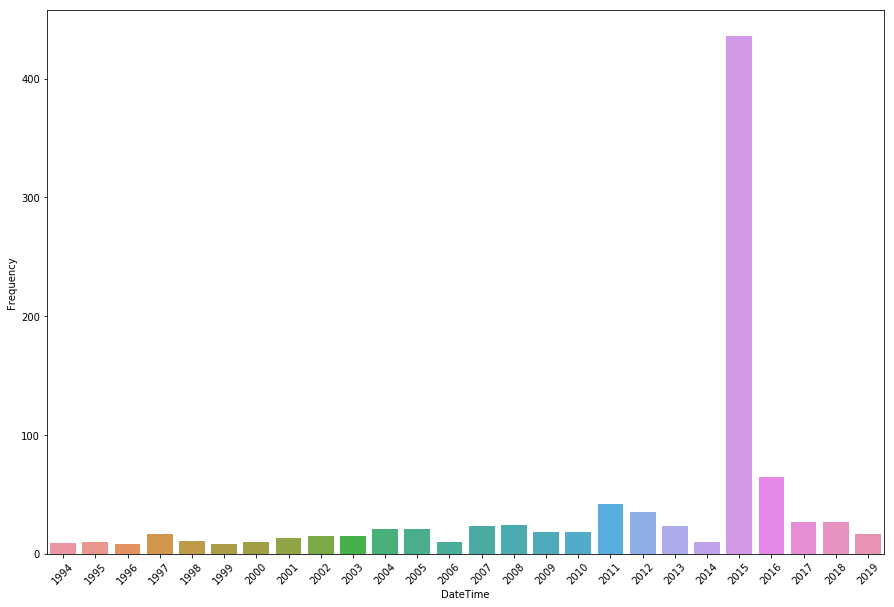

In [426]:
plt.figure(figsize=(15,10))
by_year = sns.barplot(x=group_by_year.index, y=group_by_year.Frequency)
by_year.set_xticklabels(by_year.get_xticklabels(),rotation=45)
plt.savefig('yearly_eq.png')

In [427]:
service_district = gpd.read_file('/Users/Saral/Documents/Python/earthquake/NPL_adm/NPL_adm3.shp')
# print(service_district.head())

# Print the contents of the service districts geometry in the first row
# print(service_district.loc[0, 'geometry'])

,Lat,Long,Magnitude,Epicenter,DateTime,scale,size_class,mag_class
0,27.75,86.16,5.1,Dolakha,1994-06-25 05:45:00,Slight Damage,Moderate,5-5.9
1,29.37,81.52,5.5,Bajura,1994-07-17 11:00:00,Slight Damage,Moderate,5-5.9
2,28.34,87.35,4.8,Sankhuwasabha,1994-09-25 11:00:00,Minor Damage,Light,4-4.9
3,29.00,82.26,4.6,Jajarkot,1994-10-22 11:00:00,Minor Damage,Light,4-4.9
4,28.92,82.00,4.7,Jajarkot,1994-10-24 11:00:00,Minor Damage,Light,4-4.9


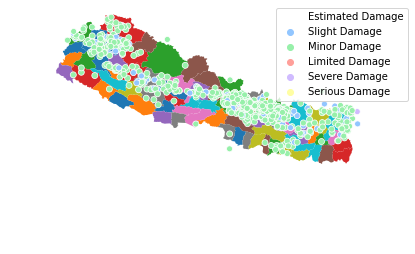

In [507]:
service_district.plot(column = 'NAME_3')
sns.scatterplot(x=df.Long, y=df.Lat, hue = df['Estimated Damage'], size_order=100)
plt.legend(bbox_to_anchor=(0.7,1), loc=2, borderaxespad=0.1)
plt.axis('off')
plt.annotate('NSC Nepal, 2019',xy=(0.1, 0),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
plt.savefig("map_export.png", dpi=300)